<a href="https://colab.research.google.com/github/fadghom-22/TugasM6-DeepLearning/blob/main/Tugas_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [47]:
!kaggle datasets download -d fadghomadani/bulu-unggas
!mkdir dataset
!unzip /content/bulu-unggas.zip -d /content/dataset

bulu-unggas.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists
Archive:  /content/bulu-unggas.zip
replace /content/dataset/Dataset/Bulu angsa/IMG20230505213011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213011.jpg  
replace /content/dataset/Dataset/Bulu angsa/IMG20230505213019.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213019.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213022.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213025.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213030.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213038.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213048.jpg  
  inflating: /content/dataset/Dataset/Bulu angsa/IMG20230505213100.jpg  
  inflating: /

In [48]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [49]:
dataset_path = Path(r'/content/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [52]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/dataset/Dataset/Bulu angsa/IMG2023050...,Bulu angsa
1,/content/dataset/Dataset/Bulu angsa/IMG2023050...,Bulu angsa
2,/content/dataset/Dataset/Bulu angsa/IMG2023050...,Bulu angsa
3,/content/dataset/Dataset/Bulu angsa/IMG2023050...,Bulu angsa
4,/content/dataset/Dataset/Bulu angsa/IMG2023050...,Bulu angsa


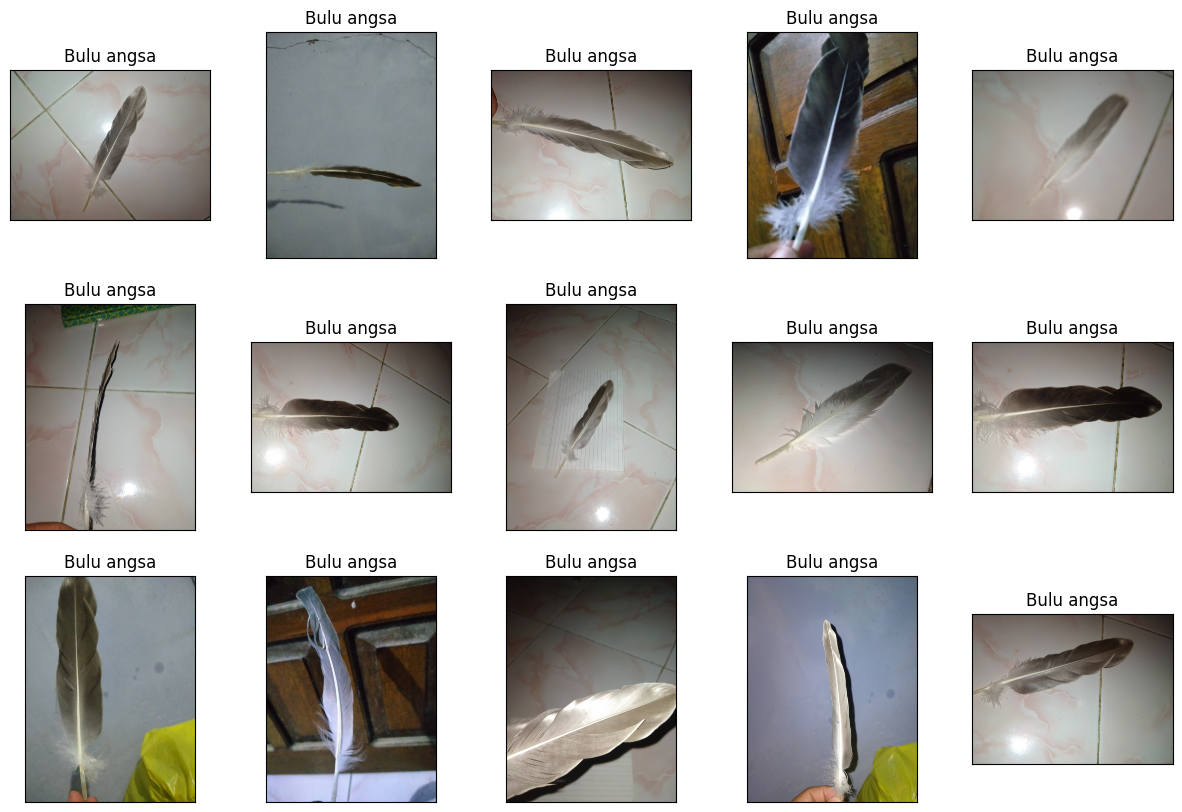

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [54]:
df.label.value_counts()

Bulu angsa           119
Bulu ayam kampung    105
Bulu mentok          100
Name: label, dtype: int64

In [55]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Bulu angsa           119
Bulu ayam kampung    105
Bulu mentok          100
Name: label, dtype: int64

In [57]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [58]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (180, 2)
Shape of test data (98, 2)
Shape of validation data (46, 2)


In [59]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 180 validated image filenames belonging to 3 classes.
Found 98 validated image filenames belonging to 3 classes.
Found 46 validated image filenames belonging to 3 classes.


In [60]:
input_shape = (200, 200, 3)

In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)      

In [62]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 32, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
6/6 [==============================] - 64s 10s/step - loss: 1.1091 - accuracy: 0.3167 - val_loss: 1.0831 - val_accuracy: 0.3043
Epoch 2/50
6/6 [==============================] - 54s 9s/step - loss: 1.0797 - accuracy: 0.3500 - val_loss: 1.0511 - val_accuracy: 0.3043
Epoch 3/50
6/6 [==============================] - 54s 9s/step - loss: 1.0083 - accuracy: 0.3333 - val_loss: 0.9107 - val_accuracy: 0.3478
Epoch 4/50
6/6 [==============================] - 51s 9s/step - loss: 0.9586 - accuracy: 0.4667 - val_loss: 0.9412 - val_accuracy: 0.4130
Epoch 5/50
6/6 [==============================] - 54s 9s/step - loss: 0.9613 - accuracy: 0.4556 - val_loss: 0.9340 - val_accuracy: 0.4348
Epoch 6/50
6/6 [==============================] - 54s 9s/step - loss: 0.9352 - accuracy: 0.4722 - val_loss: 0.8474 - val_accuracy: 0.5652
Epoch 7/50
6/6 [==============================] - 55s 10s/step - loss: 0.9440 - accuracy: 0.4833 - val_loss: 0.8858 - val_accuracy: 0.4565
Epoch 8/50
6/6 [================

In [63]:
model.save('model-1.h5')

In [64]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

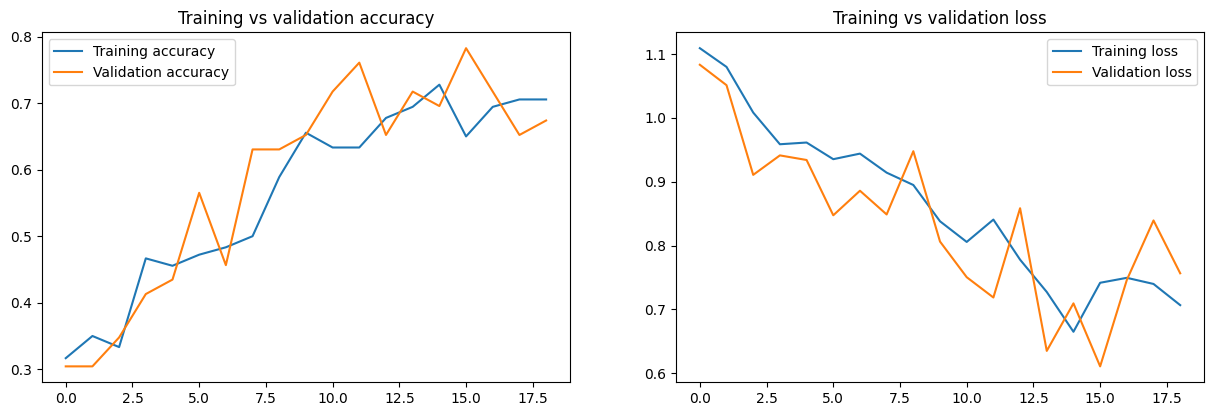

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [66]:
pred = model.predict(test)

4/4 [==============================] - 24s 5s/step


In [67]:
pred = np.argmax(pred, axis=1)

In [68]:
labels = train.class_indices


In [69]:
labels

{'Bulu angsa': 0, 'Bulu ayam kampung': 1, 'Bulu mentok': 2}

In [70]:
labels = dict((v,k) for k, v in labels.items())

In [71]:
labels

{0: 'Bulu angsa', 1: 'Bulu ayam kampung', 2: 'Bulu mentok'}

In [72]:
y_pred = [labels[k] for k in pred]

In [73]:
print(classification_report(x_test.label, y_pred))

                   precision    recall  f1-score   support

       Bulu angsa       0.67      0.86      0.75        44
Bulu ayam kampung       0.73      0.75      0.74        32
      Bulu mentok       0.88      0.32      0.47        22

         accuracy                           0.70        98
        macro avg       0.76      0.64      0.65        98
     weighted avg       0.73      0.70      0.68        98



In [74]:
print(confusion_matrix(x_test.label, y_pred))

[[38  5  1]
 [ 8 24  0]
 [11  4  7]]


In [75]:
test_accuracy = model.evaluate(test)[1]

4/4 [==============================] - 23s 5s/step - loss: 0.6998 - accuracy: 0.7551
